In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Spotify_dataset_final_cleaned_and_normalized.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               2000 non-null   int64  
 1   Song Name           2000 non-null   object 
 2   Artist              2000 non-null   object 
 3   Genre               2000 non-null   object 
 4   Popularity          2000 non-null   float64
 5   Danceability        2000 non-null   float64
 6   Energy              2000 non-null   float64
 7   Loudness            2000 non-null   float64
 8   Speechiness         2000 non-null   float64
 9   Acousticness        2000 non-null   float64
 10  Liveness            2000 non-null   float64
 11  Tempo               2000 non-null   float64
 12  Valence             2000 non-null   float64
 13  Release Year        2000 non-null   int64  
 14  Duration (minutes)  2000 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 234.5

In [4]:
from sklearn.preprocessing import StandardScaler

# Selecting the predictor attributes
features = df[['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (minutes)', 'Valence']]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [8]:
pip install kneed

C:\Users\Checkout\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Checkout\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Checkout\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Checkout\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

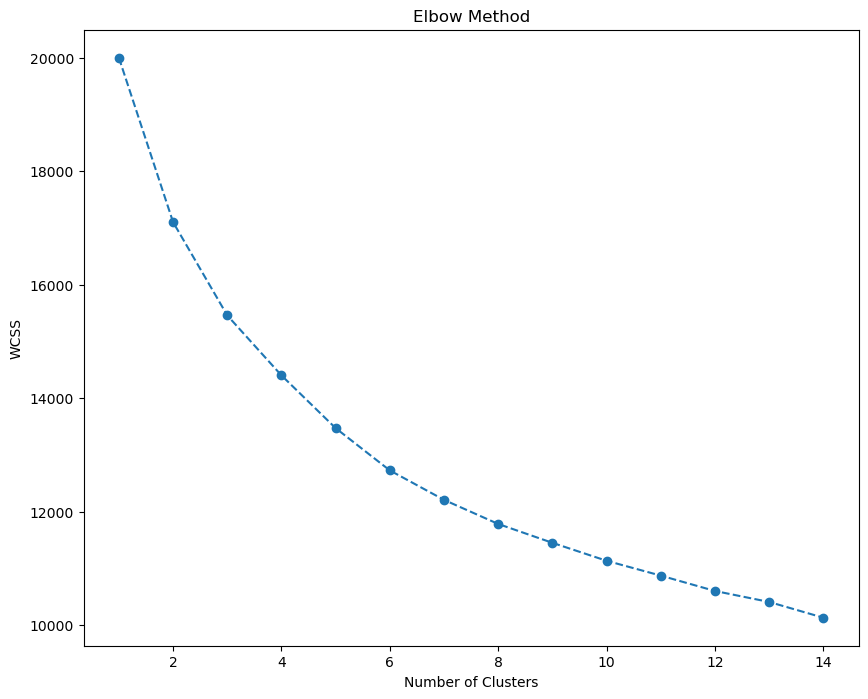

Optimal number of clusters: 5


C:\Users\Checkout\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.12
Davies-Bouldin Score: 1.94


In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from kneed import KneeLocator

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Determine the elbow point using KneeLocator
n_clusters = KneeLocator(range(1, 15), wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters:", n_clusters)

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
labels = kmeans.fit_predict(features_scaled)

# Evaluate clustering performance
silhouette_avg = silhouette_score(features_scaled, labels)
db_score = davies_bouldin_score(features_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Score: {db_score:.2f}")

# Save the cluster labels
df['Cluster_Labels'] = labels
df.to_csv("Spotify_with_clusters.csv", index=False)


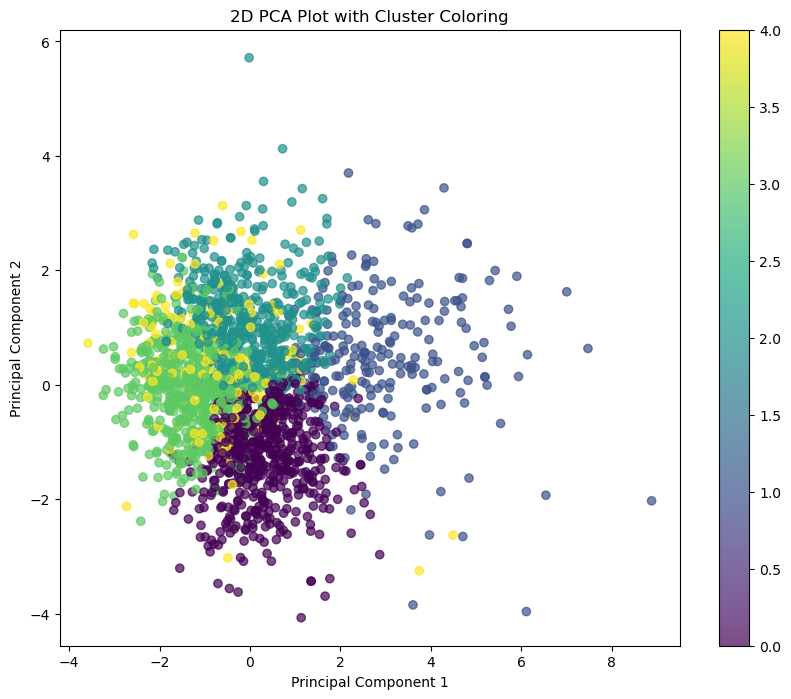

In [11]:
# Optional: Visualize clusters using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Plot with Cluster Coloring')
plt.colorbar()
plt.show()

# DBSCAN